# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
df = pd.read_spss('../data/CCAM SPSS Data 2008-2018.sav')
df.to_csv('../data/CCAM SPSS Data 2008-2018.csv', index=False)
df = pd.read_csv('../data/CCAM SPSS Data 2008-2018.csv')

In [3]:
geo = pd.read_csv('../data/YCOM6.0_2021_Data_.csv', encoding='latin-1')

In [4]:
df.drop('case_ID', axis=1, inplace=True)

# Initial Inspection 

In [5]:
def columns_info(df):
    columns_df = pd.DataFrame({'nulls': [df[col].isna().sum() for col in df.keys()], 
                         'dtype': [df[col].dtype for col in df.keys()], 
                         'nunique_values': [df[col].nunique() for col in df.keys()], 
                         'unique_values': [df[col].unique()for col in df.keys()], 
                         'value_counts': [df[col].value_counts() for col in df.keys()]}, 
                         index=[col for col in df.keys()])
    return columns_df

# Function to Inspect Column
def col_info(col):
    return pd.DataFrame({'nulls': df[col].isna().sum(), 
                         'dtype': df[col].dtype,
                         'nunique': df[col].nunique(), 
                         'unique_values': [df[col].unique()], 
                         'value_counts': [df[col].value_counts()]}, 
                         index=[col])

In [6]:
columns_info(df)

,nulls,dtype,nunique_values,unique_values,value_counts
wave,0,object,19,"[Nov 2008, Jan 2010, Jun 2010, May 2011, Nov 2...",Nov 2008 2164 Oct 2015 1330 Oct 2017 ...
year,0,int64,10,"[2008, 2010, 2011, 2012, 2013, 2014, 2015, 201...",2015 2593 2017 2570 2016 2430 2018 ...
weight_wave,0,float64,8230,"[0.5400000000000001, 0.85, 0.49, 0.29, 1.29, 2...",0.5400 80 0.6100 78 0.4200 77 0.4100 ...
weight_aggregate,0,float64,11648,"[0.2944021792003114, 0.4634108376301197, 0.267...",0.299854 30 0.294402 29 0.316210 29 0...
happening,0,object,4,"[Yes, Don't know, No, Refused]",Yes 14915 Don't know 3818 No ...
cause_original,0,object,5,"[Caused mostly by human activities, Caused mos...",Caused mostly by human activities ...
cause_other_text,20426,object,1390,"[nan, both of the above, a combination of huma...",both ...
cause_recoded,0,object,7,"[Caused mostly by human activities, Caused mos...",Caused mostly by human activities ...
sci_consensus,1330,object,5,[Most scientists think global warming is happe...,Most scientists think global warming is happen...
worry,0,object,5,"[Somewhat worried, Not very worried, Not at al...",Somewhat worried 9049 Not very worried ...


---
---

# Eploratory Data Analysis

1. [ ] wave
    - distribution
2. [ ]  year
3. [ ]  weight_wave
4. [ ]  weight_aggregate
5. [ ]  happening
6. [ ]  cause_original
7. [ ]  cause_other_text
8. [ ]  cause_recoded
9. [ ]  sci_consensus
10. [ ]  worry
11. [ ]  harm_personally
12. [ ]  harm_US
13. [ ]  harm_dev_countries

### Happening

In [18]:
df.happening.value_counts().to_frame()

,happening
Yes,14915
Don't know,3818
No,3612
Refused,71


### Dichotomize Target 

In [19]:
df['target'] = [1 if x == 'Yes' else 0 for x in df.happening]

In [153]:
df['target'].value_counts(normalize=True)

1    0.668867
0    0.331133
Name: target, dtype: float64

### `happening` vs `target`

''

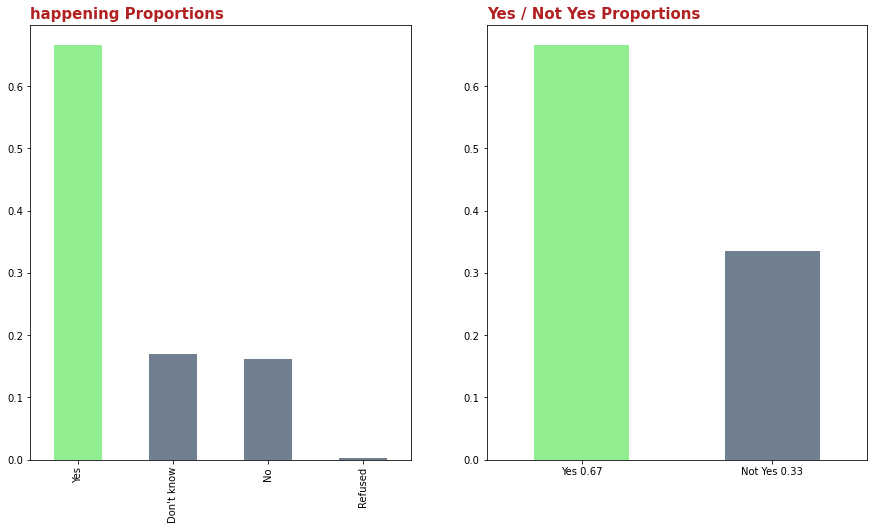

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

df.happening.value_counts(normalize=True).plot(kind='bar', 
                                               color=['lightgreen', 
                                                      'slategrey', 
                                                      'slategrey', 
                                                      'slategrey'],
                                               ax=ax[0])
ax[0].set_title('happening Proportions', 
                fontsize=15, 
                fontweight='bold', 
                color='firebrick', 
                loc='left')

df.target.value_counts(normalize=True).plot(kind='bar', 
                                            color=['lightgreen', 
                                                   'slategrey'], 
                                            ax=ax[1])
ax[1].set_title('Yes / Not Yes Proportions', 
                fontsize=15, 
                fontweight='bold', 
                color='firebrick', 
                loc='left')
plt.xticks(rotation = 0)
ax[1].set_xticklabels(['Yes ' + str(round(df['target'].value_counts(normalize=True)[1], 2)),
                       'Not Yes ' + str(round(df['target'].value_counts(normalize=True)[0], 2))])


;

### Wave

In [7]:
df.wave = [' '.join(wave.split(' ')[::-1]) for wave in df.wave]

In [8]:
df.wave.value_counts().sort_index().to_frame()

,wave
2008 Nov,2164
2010 Jan,1001
2010 Jun,1024
2011 May,1010
2011 Nov,1000
2012 Mar,1008
2012 Sep,1061
2013 Apr,1045
2013 Nov,830
2014 Apr,1013


In [9]:
df.wave.value_counts().sort_index()[1:].values.mean()

1125.111111111111

In [10]:
# df.wave.plot()

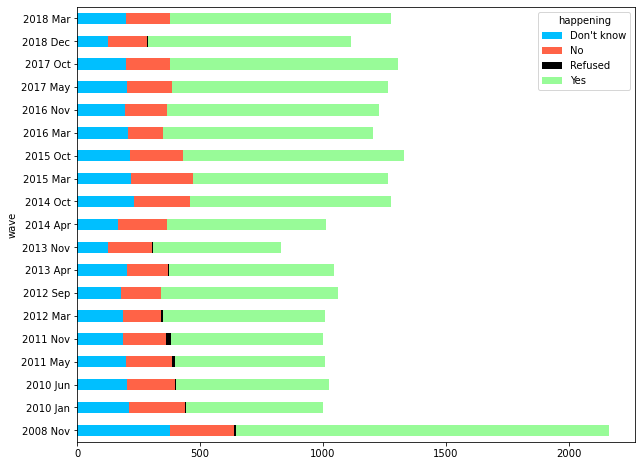

In [11]:
df.groupby('wave')['happening'].value_counts(normalize=False) \
    .unstack() \
    .plot(kind='barh',
          figsize=(10, 8), 
          stacked=True,
          color=['deepskyblue', 'tomato', 'black', 'palegreen']);

**Wave**

Observation
- The first poll had the largest number of responses. 
- Each poll afterwards had 1125 responses on average. 
- It seems like the number of people in each poll was divided in half after the first year. 

### Year

**Proportion of Believe in Climate Change over 2008 - 2018**

''

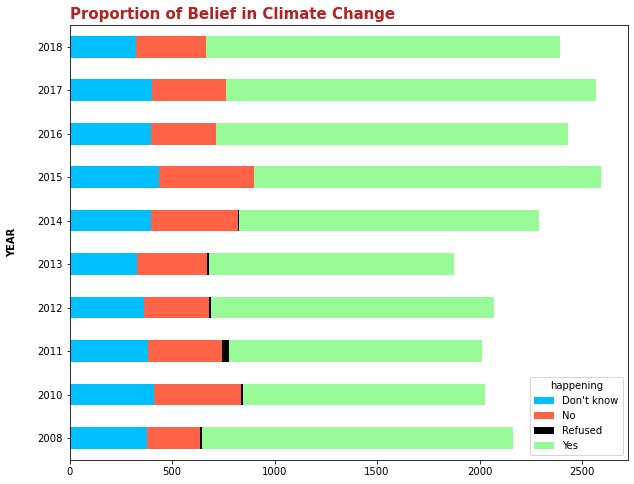

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))

df.groupby('year')['happening'].value_counts(normalize=False).unstack()\
    .plot(kind='barh', 
          figsize=(10, 8), 
          stacked=True,
          color=['deepskyblue', 'tomato', 'black', 'palegreen'], 
          ax=ax)

ax.set_title('Proportion of Belief in Climate Change', 
             fontsize=15, 
             fontweight='bold', 
             color='firebrick', 
             loc='left')
ax.set_ylabel('YEAR', weight='bold', labelpad=20)

;

In [13]:
df.year.value_counts().to_frame()

,year
2015,2593
2017,2570
2016,2430
2018,2392
2014,2288
2008,2164
2012,2069
2010,2025
2011,2010
2013,1875


In [14]:
df.groupby('year')['happening'].value_counts(normalize=True).to_frame()

happening
year happening            
2008 Yes          0.701017
     Don't know   0.173752
     No           0.121072
     Refused      0.004159
2010 Yes          0.582716
     No           0.210370
     Don't know   0.201975
     Refused      0.004938
2011 Yes          0.613433
     Don't know   0.190050
     No           0.180597
     Refused      0.015920
2012 Yes          0.666989
     Don't know   0.175930
     No           0.152731
     Refused      0.004350
2013 Yes          0.637333
     No           0.182933
     Don't know   0.175467
     Refused      0.004267
2014 Yes          0.639860
     No           0.185315
     Don't know   0.173951
     Refused      0.000874
2015 Yes          0.652526
     No           0.179715
     Don't know   0.167759
2016 Yes          0.706996
     Don't know   0.164198
     No           0.128807
2017 Yes          0.703502
     Don't know   0.156031
     No           0.140467
2018 Yes          0.722408
     No           0.141304
     Don't know   0.135870
     Refused      0.000418

**Proportion of Believe in Climate Change over 2008 - 2018**

Observation
- 

### Weight Wave

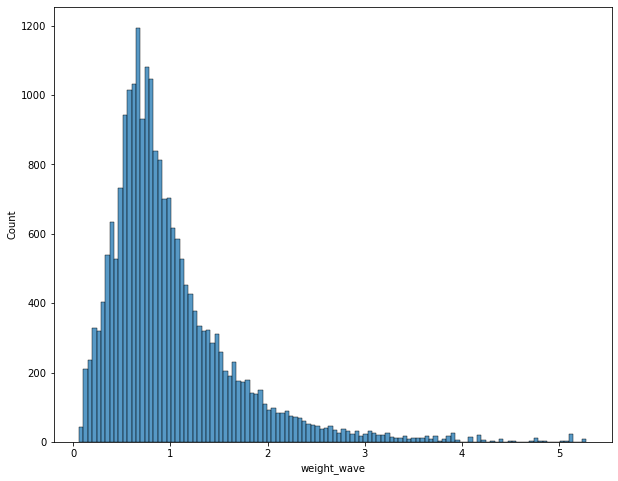

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.histplot(df, x='weight_wave', ax=ax);

In [16]:
df.weight_wave.describe()

count    22416.000000
mean         0.999984
std          0.660911
min          0.060000
25%          0.585600
50%          0.825000
75%          1.223250
max          5.280000
Name: weight_wave, dtype: float64

In [17]:
df.groupby('year')['weight_wave'].value_counts().to_frame()

weight_wave
year weight_wave             
2008 0.5500                30
     0.5400                29
     0.5800                29
     0.5700                28
     0.6100                28
...                       ...
2018 3.2767                 1
     3.2917                 1
     3.4013                 1
     3.6874                 1
     3.7050                 1

[11077 rows x 1 columns]

**weight_wave**

Observation
- Not sure how they calculated the sampling weight for different waves of polling 
- I don't see how this feature would be useful in modeling or analyzing relationships between features and target

### Cause Original
Assuming global warming is happening do you think it is...

In [23]:
df.happening.value_counts().to_frame()

,happening
Yes,14915
Don't know,3818
No,3612
Refused,71


In [24]:
df.cause_original.value_counts().to_frame()

,cause_original
Caused mostly by human activities,11542
Caused mostly by natural changes in the environment,7159
Other (Please specify),2126
None of the above because global warming isn't happening,1494
Refused,95


In [25]:
df.groupby('happening')['cause_original'].value_counts().to_frame()

cause_original
happening  cause_original                                                    
Don't know Caused mostly by natural changes in the environ...            1874
           Caused mostly by human activities                             1119
           Other (Please specify)                                         436
           None of the above because global warming isn't ...             359
           Refused                                                         30
No         Caused mostly by natural changes in the environ...            1854
           None of the above because global warming isn't ...            1105
           Caused mostly by human activities                              342
           Other (Please specify)                                         303
           Refused                                                          8
Refused    Refused                                                         45
           Caused mostly by human activities                               13
           Caused mostly by natural changes in the environ...              10
           Other (Please specify)                                           3
Yes        Caused mostly by human activities                            10068
           Caused mostly by natural changes in the environ...            3421
           Other (Please specify)                                        1384
           None of the above because global warming isn't ...              30
           Refused                                                         12

In [26]:
df.groupby('target')['cause_original'].value_counts().to_frame()

cause_original
target cause_original                                                    
0      Caused mostly by natural changes in the environ...            3738
       Caused mostly by human activities                             1474
       None of the above because global warming isn't ...            1464
       Other (Please specify)                                         742
       Refused                                                         83
1      Caused mostly by human activities                            10068
       Caused mostly by natural changes in the environ...            3421
       Other (Please specify)                                        1384
       None of the above because global warming isn't ...              30
       Refused                                                         12

''

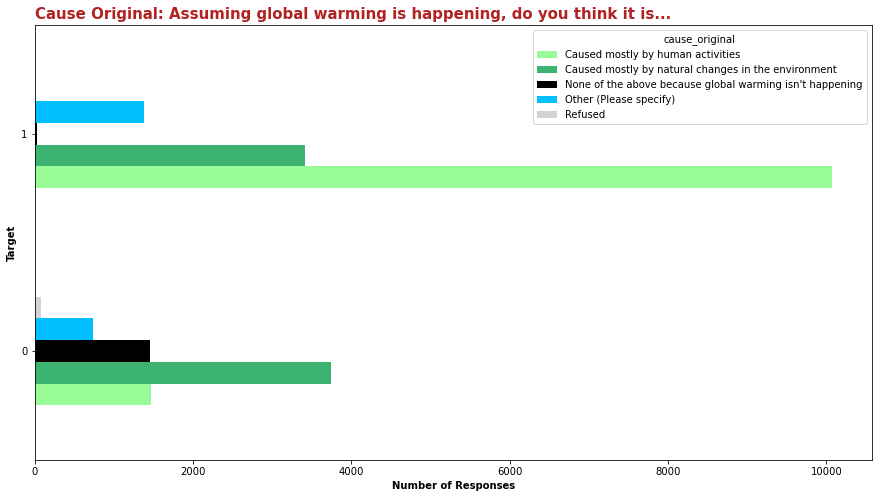

In [27]:
fig, ax = plt.subplots(figsize=(15, 8))

df.groupby('target')['cause_original'].value_counts().unstack() \
                                      .plot(kind='barh', 
                                            ax=ax, 
#                                             stacked=True, 
                                            color=['palegreen', 
                                                   'mediumseagreen', 
                                                   'black', 
                                                   'deepskyblue',
                                                   'lightgrey'], 
                                           label=('1', '2'))
ax.set_title('Cause Original: Assuming global warming is happening, do you think it is...', 
             fontsize=15, 
             fontweight='bold', 
             color='firebrick', 
             loc='left')
ax.set_ylabel('Target', weight='bold')
ax.set_xlabel('Number of Responses', weight='bold')
;


**Cause Original**

Observation 
- 95 people refused to answer this question 
- For each `happening` subgroup, some people "None of the above because global warming isn't happening." 30 people who said "Yes" to `happening` selected this response for this question 
- For the 'No' subgroup of `happening`, 2,960 people selected either of the two choices that state what the cause of global warming is. This is a contradiction. 

### Cause Other Text

[Other - Specify] Assuming global warming is happening, do you think it is...

- This feature had empty strings that I converted to np.nan
- Were these questions only answered if cause_original responses was "Other"

In [28]:
# Number of "Other (Please specify)" in cause_original
df.cause_original.value_counts()[2]

2126

In [29]:
# Responses to cause_original for people who didn't answer this question 
df[df.cause_other_text == '']['cause_original'].value_counts().to_frame()

,cause_original


In [30]:
# 1991 people who responded "Other" to cause_original failed to specify here
df[df.cause_other_text != '']['cause_original'].value_counts().to_frame()

,cause_original
Caused mostly by human activities,11542
Caused mostly by natural changes in the environment,7159
Other (Please specify),2126
None of the above because global warming isn't happening,1494
Refused,95


In [31]:
# How many people didn't answer this question 
df[df.cause_other_text == '']['target'].count()

0

In [32]:
# How many people did answer this question 
df[df.cause_other_text != '']['target'].count()

22416

In [33]:
df.cause_other_text.nunique()

1390

In [34]:
df.cause_other_text.value_counts().head(60)

both                                                          117
Both                                                           60
both of the above                                              29
combination of both                                            23
both human and natural                                         22
combination                                                    16
Both human and natural                                         14
both human and natural changes                                 13
not sure                                                       13
Both of the above                                              13
both natural and human                                         13
human and natural                                              12
God                                                            12
BOTH                                                           10
Not sure                                                        9
caused by 

**Cause Other Text**

- there are a 2126 unique answers. Many of them mean the same thing and could be grouped. It could be interesting to investigate further and get more ideas about the data.  
    - lots of people said it was both, meaning both human activity and natural causes 
    - lots of people reference God
    - lot of people said they don't know 
- 1991 people responded to this question
- 135 people who answered "Other" for `cause_original` did not specify here as instructed
- Because only 9% of people answered this question, and it overlaps with `cause_original`, this feature is unlikely to be useful

### Cause Recorded

Assuming global warming is happening, do you think it is... (Recoded to include open-ends)

- it seems this feature was created from combining both `cause_original` and `cause_original_text`

In [35]:
df.cause_recoded.value_counts().to_frame()

,cause_recoded
Caused mostly by human activities,11629
Caused mostly by natural changes in the environment,7439
Neither because global warming isn't happening,1511
Caused by human activities and natural changes,1367
Other (Please specify),252
Don't know,123
Refused,95


''

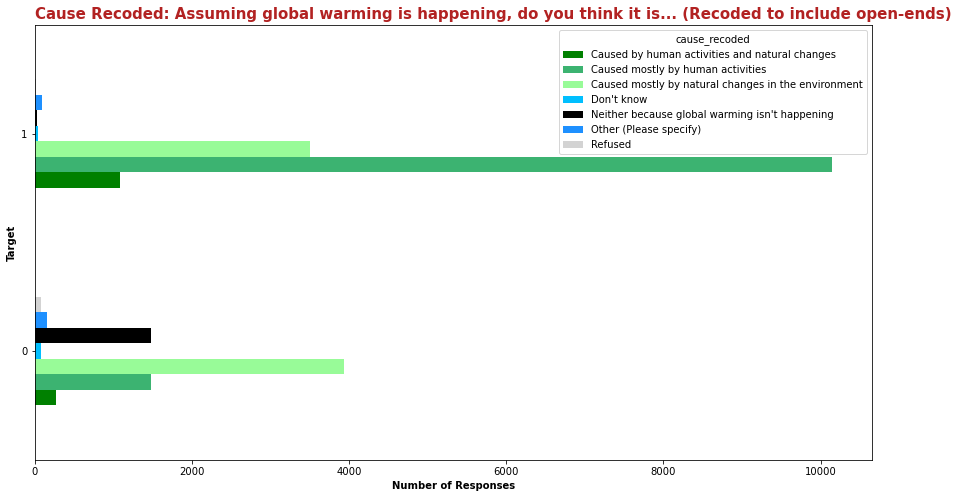

In [36]:
fig, ax = plt.subplots(figsize=(15, 8))

df.groupby('target')['cause_recoded'].value_counts().unstack() \
                                      .plot(kind='barh', 
                                            ax=ax, 
#                                             stacked=True, 
                                            color=['g', 
                                                   'mediumseagreen', 
                                                   'palegreen', 
                                                   'deepskyblue',
                                                   'black', 
                                                   'dodgerblue', 
                                                   'lightgrey'], 
                                           label=('1', '2'))
ax.set_title('Cause Recoded: Assuming global warming is happening, do you think it is... (Recoded to include open-ends)', 
             fontsize=15, 
             fontweight='bold', 
             color='firebrick', 
             loc='left')
ax.set_ylabel('Target', weight='bold')
ax.set_xlabel('Number of Responses', weight='bold')
;

In [37]:
df.groupby('target')['cause_recoded'].value_counts().to_frame()

cause_recoded
target cause_recoded                                                    
0      Caused mostly by natural changes in the environ...           3941
       Caused mostly by human activities                            1487
       Neither because global warming isn't happening               1481
       Caused by human activities and natural changes                274
       Other (Please specify)                                        158
       Refused                                                        83
       Don't know                                                     77
1      Caused mostly by human activities                           10142
       Caused mostly by natural changes in the environ...           3498
       Caused by human activities and natural changes               1093
       Other (Please specify)                                         94
       Don't know                                                     46
       Neither because global warming isn't happening                 30
       Refused                                                        12

In [38]:
print('cause_original - Refused:', 
      df[df.cause_original == 'Refused']['cause_recoded'].value_counts()[0])
print('cause_recoded - Refused:', 
      df[df.cause_original == 'Refused']['cause_original'].value_counts()[0])

cause_original - Refused: 95
cause_recoded - Refused: 95


In [39]:
print('cause_original - Other:', 
    df[df.cause_original == 'Other (Please specify)']['cause_original'].value_counts()[0])
print('cause_recoded - Other:', 
    df[df.cause_recoded == 'Other (Please specify)']['cause_recoded'].value_counts()[0])

cause_original - Other: 2126
cause_recoded - Other: 252


In [40]:
df[df.cause_original == 'Other (Please specify)']['cause_recoded'].value_counts().to_frame()

,cause_recoded
Caused by human activities and natural changes,1367
Caused mostly by natural changes in the environment,280
Other (Please specify),252
Don't know,123
Caused mostly by human activities,87
Neither because global warming isn't happening,17


**Cause Recoded**

Observation 
- "Don't Know" and "Caused by human activities and natural changes" were added. 
- "Refused" had no change between `cause_original` and `cause_original_text`
- Differences in answers from `cause_original` = "Other (Please specify) and `cause_recoded`
    - 17 people answered "Neither because global warming isn't happening" here
    - 1647 people answered either the 1st 2 questions meaning they believe in Global Warming 
    - 252 people still responded "Other (Please specify)" 

### SCI Concensus 

Scientist Consensus: Which comes closest to your own view?
- Not asked in Oct 2015

In [41]:
# Number of Nulls in sci_consensus from "2016 Oct"
df.sci_consensus.isnull().sum()

1330

In [42]:
df.sci_consensus.value_counts().to_frame()

,sci_consensus
Most scientists think global warming is happening,9397
There is a lot of disagreement among scientists about whether or not global warming is happening,7296
Don't know enough to say,3596
Most scientists think global warming is not happening,707
Refused,90


''

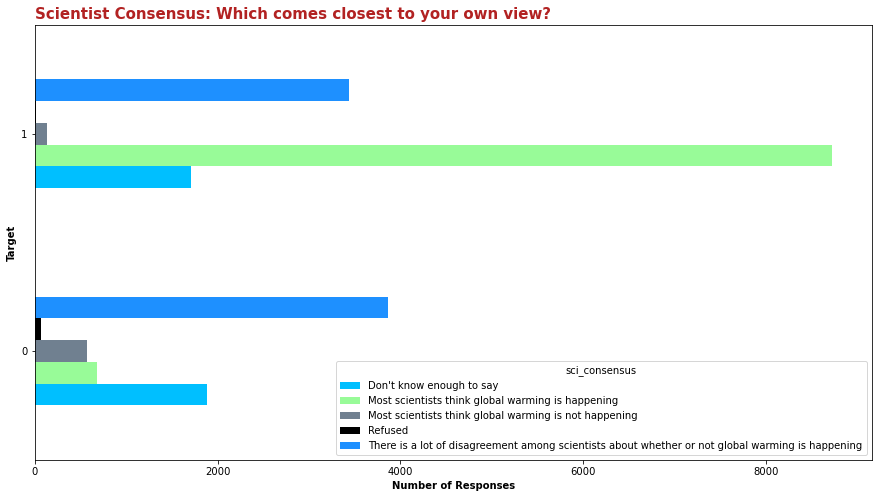

In [43]:
fig, ax = plt.subplots(figsize=(15, 8))

df.groupby('target')['sci_consensus'].value_counts().unstack() \
                                      .plot(kind='barh', 
                                            ax=ax, 
                                            color=['deepskyblue', 
                                                   'palegreen', 
                                                   'slategrey',
                                                   'black', 
                                                   'dodgerblue'], 
                                           label=('1', '2'))
ax.set_title('Scientist Consensus: Which comes closest to your own view?', 
             fontsize=15, fontweight='bold', color='firebrick', loc='left')
ax.set_ylabel('Target', weight='bold')
ax.set_xlabel('Number of Responses', weight='bold')
;

In [44]:
df.groupby('target')['sci_consensus'].value_counts().to_frame()

sci_consensus
target sci_consensus                                                    
0      There is a lot of disagreement among scientists...           3859
       Don't know enough to say                                     1885
       Most scientists think global warming is happening             682
       Most scientists think global warming is not hap...            573
       Refused                                                        71
1      Most scientists think global warming is happening            8715
       There is a lot of disagreement among scientists...           3437
       Don't know enough to say                                     1711
       Most scientists think global warming is not hap...            134
       Refused                                                        19

**Science Consensus**

Observation 
- 90 people Refused to answer this question 
- This question is the least likely to leak data into the model
- 1330 Nulls for this feature from 2015 Oct
    - possible to impute with KNNImputer

### Worry

How worried are you about global warming?

In [45]:
df.worry.value_counts().to_frame()

,worry
Somewhat worried,9049
Not very worried,6006
Not at all worried,3845
Very worried,3433
Refused,83


''

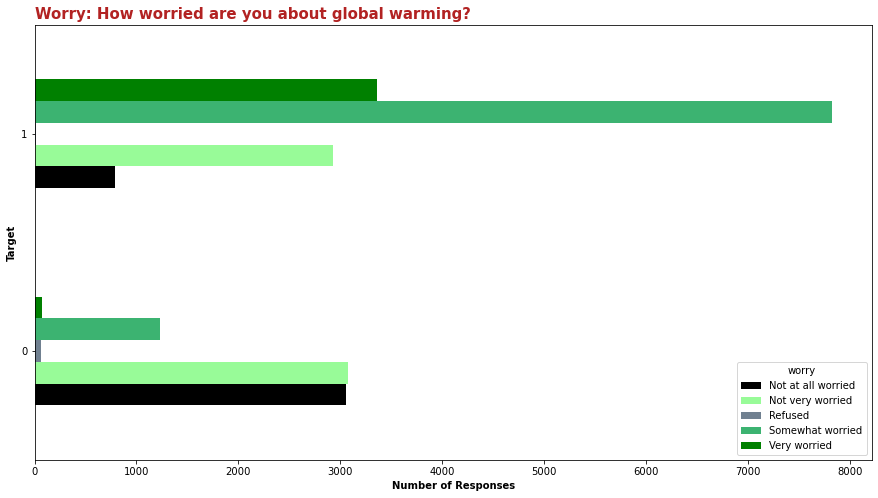

In [46]:
fig, ax = plt.subplots(figsize=(15, 8))

df.groupby('target')['worry'].value_counts().unstack() \
                                      .plot(kind='barh', 
                                            ax=ax, 
                                            color=['black', 
                                                   'palegreen', 
                                                   'slategrey',
                                                   'mediumseagreen',
                                                   'g'], 
                                           label=('1', '2'))
ax.set_title('Worry: How worried are you about global warming?', 
             fontsize=15, fontweight='bold', color='firebrick', loc='left')
ax.set_ylabel('Target', weight='bold')
ax.set_xlabel('Number of Responses', weight='bold')
;

In [47]:
df.groupby('target')['worry'].value_counts().to_frame()

worry
target worry                    
0      Not very worried     3076
       Not at all worried   3056
       Somewhat worried     1227
       Very worried           77
       Refused                65
1      Somewhat worried     7822
       Very worried         3356
       Not very worried     2930
       Not at all worried    789
       Refused                18

**Worry**

Observation 
- 83 people Refused 
- For `happening` = "Not Yes"
    - 68 Refused
    - 3056 Not at all worried 
    - 19292 expressed some level of worry
- This feature might be misleading for predicting the target
- This feature could be reduced to binary (worry_True, worry_False) for OHE
- Could also reduce to 3 subgroups (not_worried, worried, very_worried)

## Harm Series of Questions
The following five risk perception questions were asked together as a set
- harm_personally
- harm_US
- harm_dev_coutnries
- harm_future_gen
- harm_plants_animals

### Harm Personally
How much do you think global warming will harm: You personally

In [48]:
df.harm_personally.value_counts().to_frame()

,harm_personally
Only a little,6024
Not at all,5604
A moderate amount,5581
A great deal,2563
Don't know,2541
Refused,103


''

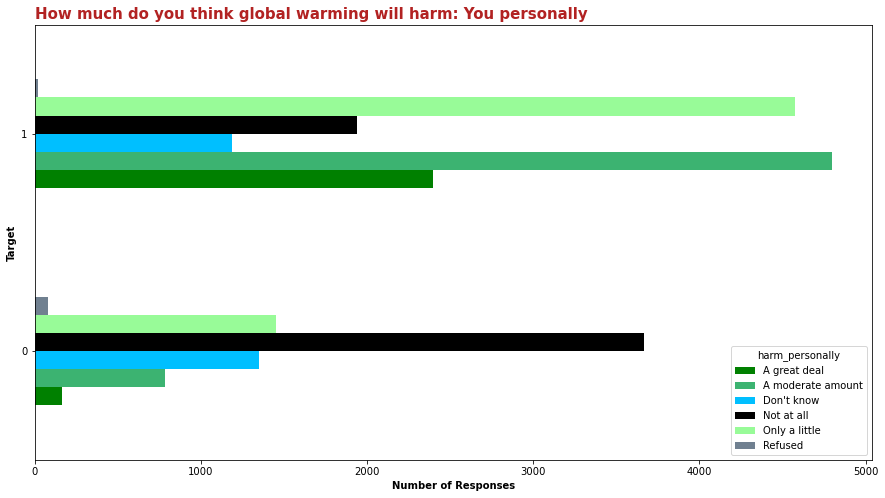

In [49]:
fig, ax = plt.subplots(figsize=(15, 8))

df.groupby('target')['harm_personally'].value_counts().unstack() \
                                      .plot(kind='barh', 
                                            ax=ax, 
                                            color=['g', 
                                                   'mediumseagreen', 
                                                   'deepskyblue',
                                                   'black', 
                                                   'palegreen',                                                  
                                                   'slategrey'], 
                                           label=('1', '2'))
ax.set_title('How much do you think global warming will harm: You personally', 
             fontsize=15, fontweight='bold', color='firebrick', loc='left')
ax.set_ylabel('Target', weight='bold')
ax.set_xlabel('Number of Responses', weight='bold')
;

In [50]:
df.groupby('target')['harm_personally'].value_counts().to_frame()

harm_personally
target harm_personally                   
0      Not at all                    3666
       Only a little                 1450
       Don't know                    1351
       A moderate amount              785
       A great deal                   167
       Refused                         82
1      A moderate amount             4796
       Only a little                 4574
       A great deal                  2396
       Not at all                    1938
       Don't know                    1190
       Refused                         21

**Harm Personally**

Observation 
- 103 people "Refused"
- This will be a good predictor 

### Harm US
How much do you think global warming will harm: People in the United States

In [51]:
df.harm_US.value_counts().to_frame()

,harm_US
A moderate amount,6729
A great deal,5077
Only a little,4301
Not at all,3635
Don't know,2550
Refused,124


''

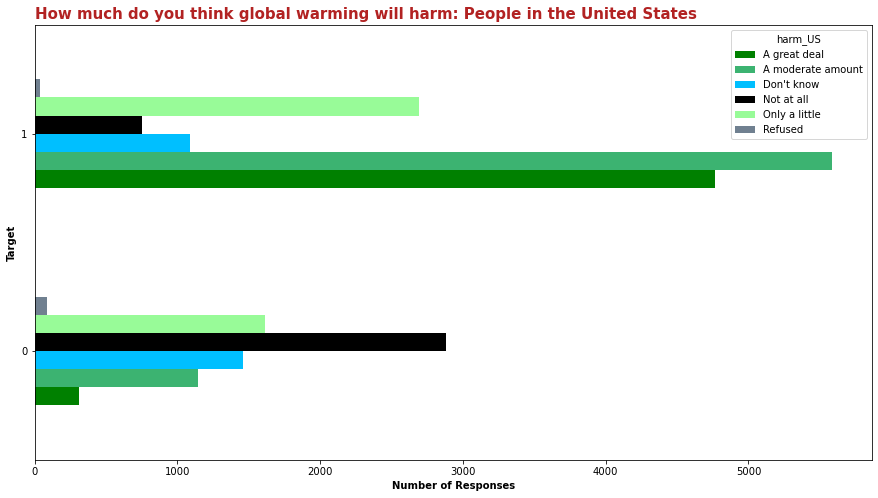

In [52]:
fig, ax = plt.subplots(figsize=(15, 8))

df.groupby('target')['harm_US'].value_counts().unstack() \
                                      .plot(kind='barh', 
                                            ax=ax, 
                                            color=['g', 
                                                   'mediumseagreen', 
                                                   'deepskyblue',
                                                   'black', 
                                                   'palegreen',                                                  
                                                   'slategrey'], 
                                           label=('1', '2'))
ax.set_title('How much do you think global warming will harm: People in the United States', 
             fontsize=15, fontweight='bold', color='firebrick', loc='left')
ax.set_ylabel('Target', weight='bold')
ax.set_xlabel('Number of Responses', weight='bold')
;

In [53]:
df.groupby('target')['harm_US'].value_counts().to_frame()

harm_US
target harm_US                   
0      Not at all            2883
       Only a little         1612
       Don't know            1462
       A moderate amount     1146
       A great deal           310
       Refused                 88
1      A moderate amount     5583
       A great deal          4767
       Only a little         2689
       Don't know            1088
       Not at all             752
       Refused                 36

### Harm Developing Countries
How much do you think global warming will harm: People in developing countries

In [54]:
df.harm_dev_countries.value_counts()

A great deal         7313
A moderate amount    5477
Not at all           3308
Only a little        3285
Don't know           2899
Refused               134
Name: harm_dev_countries, dtype: int64

In [55]:
df.harm_dev_countries.value_counts().to_frame()

,harm_dev_countries
A great deal,7313
A moderate amount,5477
Not at all,3308
Only a little,3285
Don't know,2899
Refused,134


''

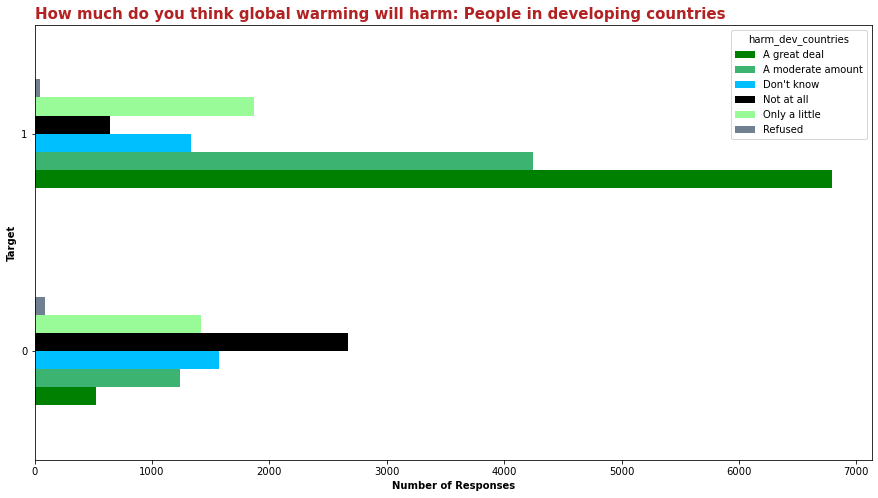

In [57]:
fig, ax = plt.subplots(figsize=(15, 8))

df.groupby('target')['harm_dev_countries'].value_counts().unstack() \
                                      .plot(kind='barh', 
                                            ax=ax, 
                                            color=['g', 
                                                   'mediumseagreen', 
                                                   'deepskyblue',
                                                   'black', 
                                                   'palegreen',                                                  
                                                   'slategrey'], 

                                           label=('1', '2'))
ax.set_title('How much do you think global warming will harm: People in developing countries', 
             fontsize=15, fontweight='bold', color='firebrick', loc='left')
ax.set_ylabel('Target', weight='bold')
ax.set_xlabel('Number of Responses', weight='bold')
;

In [58]:
df.groupby('target')['harm_dev_countries'].value_counts().to_frame()

harm_dev_countries
target harm_dev_countries                    
0      Not at all                        2669
       Don't know                        1569
       Only a little                     1414
       A moderate amount                 1235
       A great deal                       523
       Refused                             91
1      A great deal                      6790
       A moderate amount                 4242
       Only a little                     1871
       Don't know                        1330
       Not at all                         639
       Refused                             43

---
---

**Rows with too many questions answered "Refused"**

In [59]:
df.happening.value_counts()

Yes           14915
Don't know     3818
No             3612
Refused          71
Name: happening, dtype: int64

In [60]:
# Cause of Global Warming 
df[(df.cause_original == 'Refused') &
   (df.cause_recoded == 'Refused') 
  ]['target'].value_counts()

0    83
1    12
Name: target, dtype: int64

In [61]:
# People who "Refused" all Harm series questions 
df[(df.harm_personally == 'Refused') & 
   (df.harm_US == 'Refused') & 
   (df.harm_dev_countries == 'Refused') & 
   (df.harm_future_gen == 'Refused') & 
   (df.harm_plants_animals == 'Refused') 
  ]['target'].value_counts()

0    70
1     8
Name: target, dtype: int64

In [62]:
# Cause of Global Warming 
df[(df.cause_original == 'Refused') &
   (df.cause_recoded == 'Refused') 
  ]['target'].value_counts()

0    83
1    12
Name: target, dtype: int64

In [63]:
# People who "Refused" Cause questions and all Harm series questions 
df[(df.cause_original == 'Refused') &
   (df.cause_recoded == 'Refused') &
   (df.harm_personally == 'Refused') & 
   (df.harm_US == 'Refused') & 
   (df.harm_dev_countries == 'Refused') & 
   (df.harm_future_gen == 'Refused') & 
   (df.harm_plants_animals == 'Refused') 
  ]['target'].value_counts()

0    50
Name: target, dtype: int64

**Questions with "Refused" possible answers**

happening

harm_personally
harm_US
harm_dev_countries
harm_future_gen
harm_plants_animals

cause_original
cause_other_text
cause_recoded
sci_consensus
worry
harm_personally
harm_US
harm_dev_countries
harm_future_gen
harm_plants_animals
when_harm_US
reg_CO2_pollutant
reg_utilities
fund_research
reg_coal_emissions
discuss_GW
hear_GW_media
ideology
party
party_w_leaners
party_x_ideo
registered_voter
religion
evangelical
service_attendance

**Columns with underlying Nulls due to Poll Incongruity**

Columns with questions that weren't asked in 'all waves'
- sci_consensus
- harm_plants_animals
- reg_CO2_pollutant
- reg_utilities
- reg_coal_emissions
- hear_GW_media

# Conclusions and Recommendations 

**Features Explored:**
1. wave -> OrdinalEncode
2. year -> OrdinalEncode
3. <font color=grey>weight_wave</font>
4. <font color=grey>weight_aggregate</font>
5. **happening** (target)
    - "Refused" dropped
    - created binary class column `target` ("Yes", "Not Yes")
    - OrdinalEncode fit & transformed original `happening` column
6. <font color=grey>cause_original</font>
7. <font color=grey>cause_other_text</font>
8. cause_recoded
    - final response from features 6 & 7
9. ***sci_consensus***
    - not included for one poll (2015 Oct) 1330 rows
    - interesting feature, worth imputing with KNNImputer
10. worry
    - OrdinalEncode 
    - manufacture column `worry_y_n` with 2 basic subgroups
11. harm_personally
12. harm_US
13. harm_dev_countries


**Data Cleaning Recommendations:**
- drop rows that "Refused" all Cause and Harm series questions 
- drop remaining 24 rows that "Refused" answering `happening`
- drop columns `weight_wave` and `weight_aggregate`
- drop column `sci_consensus`

In [64]:
# Row/Column Drops

print(df.shape)

df.drop(index=df[(df.harm_personally == 'Refused') & 
                 (df.harm_US == 'Refused') & 
                 (df.harm_dev_countries == 'Refused') & 
                 (df.harm_future_gen == 'Refused') & 
                 (df.harm_plants_animals == 'Refused') 
                ]['target'].index, inplace=True)

df.drop(index=df[(df.cause_original == 'Refused') &
                 (df.cause_recoded == 'Refused') 
                ]['target'].index, inplace=True)

df.drop(index=df[df.happening == "Refused"].index, inplace=True)

df.drop(labels=['weight_wave', 'weight_aggregate'], axis=1, inplace=True) 

df.drop(labels=['sci_consensus'], axis=1, inplace=True) 

df.reset_index(drop=True, inplace=True)

print(df.shape)

(22416, 54)
(22269, 51)


In [139]:
# Manufacturing Binary feature from worry column

df['worry_y_n'] = ['worry_n' if x == 'Not at all worried' or x == 'Refused'
                   else 'worry_y' for x in df.worry]

In [131]:
# Manufacturing harm_personally_y_m_n by grouping original subgroups
df['harm_personally_y_m_n'] = ['yes' if x=='A great deal' or 
                               x=='A moderate amount' or 
                               x=='Only a little'
                               else 'maybe' if x=='Don\'t know'
                               else 'no'
                               for x in df.harm_personally]
df['harm_personally_y_m_n'].value_counts()

yes      14137
no        5618
maybe     2514
Name: harm_personally_y_m_n, dtype: int64

In [148]:
# Manufacturing harm_personally_y_m_n by grouping original subgroups
df['harm_US_y_m_n'] = ['yes' if x=='A great deal' or 
                               x=='A moderate amount' or 
                               x=='Only a little'
                               else 'maybe' if x=='Don\'t know'
                               else 'no'
                               for x in df.harm_US]
df['harm_US_y_m_n'].value_counts()

yes      16071
no        3674
maybe     2524
Name: harm_US_y_m_n, dtype: int64

# Model testing 
Binary classes, LabelEncoder, Ordinal Encoder, features aggregated to subgroups

1. Multi vs Binary Class w/ OrdinalEncoded Features
2. Multi vs Binary Class w/ Features simplified to subgroups and dummied

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, 
                              ExtraTreesClassifier, 
                              BaggingClassifier)
from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [99]:
random_state = 73
n_estimators = 200

dt = DecisionTreeClassifier(random_state=random_state,
                            class_weight='balanced',)

bdt = BaggingClassifier(dt,
                        random_state=random_state,
                        n_jobs=-1,
                        n_estimators=n_estimators)

rf = RandomForestClassifier(n_jobs=-1, 
                            class_weight='balanced',
                            random_state=random_state,
                            n_estimators=n_estimators)

et = ExtraTreesClassifier(n_jobs=-1,
                          class_weight='balanced',
                          random_state=random_state,
                          n_estimators=n_estimators)



def score(model, name, X, y):
    cv = StratifiedKFold(n_splits=10,
                         random_state=random_state,
                         shuffle=True)
    s = cross_val_score(model, X, y, cv=cv,
                        n_jobs=-1)
    print('{} Score: {:.2f} +- {:.3f}'.format(name, 
                                              s.mean(), 
                                              2 * s.std()))

# Multi vs. Binary Class  w/ Ordinal Encoded Features

**Ordinal Encoding Selected Features**
- `cause_recoded`
- `worry`
- none, `year`, `wave`

In [121]:
cats = [['Only a little', 'Not at all', "Don't know", 'A moderate amount',
       'A great deal', 'Refused'], 
        ['Only a little', 'Not at all', "Don't know", 'A moderate amount',
       'A great deal', 'Refused'], 
        [2008, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
        ['2008 Nov', '2010 Jan', '2010 Jun', '2011 May', '2011 Nov', 
        '2012 Mar', '2012 Sep', '2013 Apr', '2013 Nov', '2014 Apr',
        '2014 Oct', '2015 Mar', '2015 Oct', '2016 Mar', '2016 Nov',
        '2017 May', '2017 Oct', '2018 Mar', '2018 Dec',], 
        ['Caused mostly by human activities',
       'Caused mostly by natural changes in the environment',
       "Neither because global warming isn't happening",
       'Caused by human activities and natural changes', "Don't know",
       'Other (Please specify)'], 
        ['Somewhat worried', 'Not very worried', 'Not at all worried',
       'Very worried', 'Refused']
       ]

enc = OrdinalEncoder(categories=cats)

enc.fit(df[['harm_personally', 
            'harm_US', 
            'year', 
            'wave', 
            'cause_recoded', 
            'worry']])

X_ord = enc.transform(df[['harm_personally', 
                          'harm_US', 
                          'year', 
                          'wave', 
                          'cause_recoded', 
                          'worry']])

In [122]:
# Multiclass

l_enc = LabelEncoder()
l_enc.fit(df['happening'])
y = l_enc.transform(df['happening'])

score(dt, 'Decision Tree', X_ord, y)
score(bdt, 'Bagging DT', X_ord, y)
score(rf, 'Random Forest', X_ord, y)
score(et, 'Extra Trees', X_ord, y)

Decision Tree Score: 0.68 +- 0.018
Bagging DT Score: 0.69 +- 0.015
Random Forest Score: 0.69 +- 0.015
Extra Trees Score: 0.68 +- 0.020


In [123]:
# Binary 

y = df.target

score(dt, 'Decision Tree', X_ord, y)
score(bdt, 'Bagging DT', X_ord, y)
score(rf, 'Random Forest', X_ord, y)
score(et, 'Extra Trees', X_ord, y)

Decision Tree Score: 0.78 +- 0.015
Bagging DT Score: 0.79 +- 0.013
Random Forest Score: 0.79 +- 0.015
Extra Trees Score: 0.78 +- 0.017


# Multi vs. Binary Class  w/ Ordinal Encoded Manufactured Features

**Ordinal Encoding Selected Features**
- `cause_recoded`
- `worry`
- none, `year`, `wave`

In [150]:
cats = [['yes', 'no', 'maybe'], 
        ['yes', 'no', 'maybe'], 
        [2008, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
        ['2008 Nov', '2010 Jan', '2010 Jun', '2011 May', '2011 Nov', 
        '2012 Mar', '2012 Sep', '2013 Apr', '2013 Nov', '2014 Apr',
        '2014 Oct', '2015 Mar', '2015 Oct', '2016 Mar', '2016 Nov',
        '2017 May', '2017 Oct', '2018 Mar', '2018 Dec',], 
        ['Caused mostly by human activities',
       'Caused mostly by natural changes in the environment',
       "Neither because global warming isn't happening",
       'Caused by human activities and natural changes', "Don't know",
       'Other (Please specify)'], 
        ['worry_y', 'worry_n']
       ]

enc = OrdinalEncoder(categories=cats)

enc.fit(df[['harm_personally_y_m_n', 
            'harm_US_y_m_n', 
            'year', 
            'wave', 
            'cause_recoded', 
            'worry_y_n']])

X_ord = enc.transform(df[['harm_personally_y_m_n', 
                          'harm_US_y_m_n', 
                          'year', 
                          'wave', 
                          'cause_recoded', 
                          'worry_y_n']])

In [151]:
# Multiclass

l_enc = LabelEncoder()
l_enc.fit(df['happening'])
y = l_enc.transform(df['happening'])

score(dt, 'Decision Tree', X_ord, y)
score(bdt, 'Bagging DT', X_ord, y)
score(rf, 'Random Forest', X_ord, y)
score(et, 'Extra Trees', X_ord, y)

Decision Tree Score: 0.66 +- 0.020
Bagging DT Score: 0.67 +- 0.018
Random Forest Score: 0.67 +- 0.018
Extra Trees Score: 0.66 +- 0.019


In [152]:
# Binary 

y = df.target

score(dt, 'Decision Tree', X_ord, y)
score(bdt, 'Bagging DT', X_ord, y)
score(rf, 'Random Forest', X_ord, y)
score(et, 'Extra Trees', X_ord, y)

Decision Tree Score: 0.76 +- 0.020
Bagging DT Score: 0.76 +- 0.019
Random Forest Score: 0.76 +- 0.018
Extra Trees Score: 0.76 +- 0.019
